In [1]:
!git clone https://github.com/THU-MIG/yolov10.git
!ls yolov10

!pip install -e ./yolov10
!pip install huggingface_hub -q


Cloning into 'yolov10'...
remote: Enumerating objects: 20338, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 20338 (delta 2), reused 0 (delta 0), pack-reused 20334 (from 2)
Receiving objects: 100% (20338/20338), 11.10 MiB | 23.44 MiB/s, done.
Resolving deltas: 100% (14354/14354), done.
app.py		 docs	   flops.py  mkdocs.yml      requirements.txt
CONTRIBUTING.md  examples  LICENSE   pyproject.toml  tests
docker		 figures   logs      README.md	     ultralytics
Obtaining file:///kaggle/working/yolov10
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB

In [2]:
!pip install roboflow -q

from roboflow import Roboflow

rf = Roboflow(api_key="4OiDMztaT67GHFI6BH6h")
project = rf.workspace("fuzzybrain").project("ta_merged_v4")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.1 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
bigframes 1.42.0 requires rich<14


Extracting Dataset Version Zip to TA_merged_v4-2 in yolov8:: 100%|██████████| 4042/4042 [00:00<00:00, 4996.05it/s]


In [3]:
# !wget https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt

In [4]:
!pip uninstall -y ultralytics
!pip install -q ultralytics

from ultralytics import YOLO

model = YOLO('yolov10m.pt')

Found existing installation: ultralytics 8.1.34
Uninstalling ultralytics-8.1.34:
  Successfully uninstalled ultralytics-8.1.34
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 32.1M/32.1M [00:00<00:00, 166MB/s]


In [5]:
results = model.train(
  data=f'{dataset.location}/data.yaml',  # Path dataset dari Roboflow
  epochs=100,       # Jumlah epoch
  batch=8,         # Batch size
  imgsz=896,        # Ukuran input image
  optimizer='AdamW', # Optimizer
  lr0=0.001,        # Learning rate awal
  patience=20      # Early stopping jika model stagnan selama 20 epoch
)

Ultralytics 8.3.162 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/TA_merged_v4-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=896, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1941.9±883.6 MB/s, size: 114.0 KB)


train: Scanning /kaggle/working/TA_merged_v4-2/train/labels... 1660 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1660/1660 [00:01<00:00, 1285.35it/s]


train: New cache created: /kaggle/working/TA_merged_v4-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 961.9±705.4 MB/s, size: 118.2 KB)


val: Scanning /kaggle/working/TA_merged_v4-2/valid/labels... 237 images, 0 backgrounds, 0 corrupt: 100%|██████████| 237/237 [00:00<00:00, 1169.87it/s]

val: New cache created: /kaggle/working/TA_merged_v4-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
Image sizes 896 train, 896 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.18G      3.522      3.395      2.973         17        896: 100%|██████████| 208/208 [01:58<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]

                   all        237        944      0.783      0.652       0.74       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.15G      3.263      2.386      2.806         33        896: 100%|██████████| 208/208 [01:58<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.743      0.704      0.793      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.15G      3.216      2.248      2.798         23        896: 100%|██████████| 208/208 [01:57<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.481      0.678      0.695      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.14G      3.153      2.214      2.745         10        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.889      0.752      0.851      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.14G      3.074      1.965      2.748         17        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.897      0.744       0.84      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.14G      2.989      1.835      2.677         20        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.889      0.771      0.867      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.14G      2.973      1.802      2.645         22        896: 100%|██████████| 208/208 [01:57<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.871      0.794      0.876      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.17G      2.961      1.763      2.648         15        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.879      0.766      0.865      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.15G      2.952      1.753      2.633         22        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.876      0.821      0.893       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.18G      2.829      1.675      2.577         18        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.876      0.809      0.887      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       8.2G      2.837      1.594       2.58         20        896: 100%|██████████| 208/208 [01:57<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944       0.92       0.83      0.907      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.15G      2.813      1.612      2.551         12        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]

                   all        237        944      0.908      0.816      0.908      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.13G      2.743      1.616      2.515         10        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.905      0.838      0.917       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.15G      2.636      1.455      2.494         24        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.925       0.82      0.915      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.16G      2.689      1.451      2.498          6        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.922      0.829      0.916      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.15G      2.632      1.414      2.483         15        896: 100%|██████████| 208/208 [01:57<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.925      0.832      0.904      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.12G      2.631       1.43      2.474         40        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.36it/s]

                   all        237        944      0.904      0.851      0.925      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.15G      2.649      1.425      2.486         21        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.923      0.819      0.911      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.14G      2.577      1.347      2.439         23        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.36it/s]

                   all        237        944      0.929      0.834      0.926        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.13G      2.543      1.337      2.452         22        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.894      0.847      0.925      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.17G       2.49      1.317      2.409         20        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.36it/s]

                   all        237        944      0.906      0.862      0.932      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.14G      2.467      1.267      2.399         16        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.919      0.836      0.919      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.15G      2.454      1.264       2.39         24        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.912      0.852      0.933      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.21G      2.474      1.254      2.376         26        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]

                   all        237        944       0.93      0.815      0.915      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.15G      2.486      1.301      2.381         28        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.923      0.846      0.932      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.15G       2.43      1.213      2.393         25        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.916      0.851       0.93      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.13G      2.418      1.198      2.344         40        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.942      0.837      0.936      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.13G      2.382      1.162      2.346         38        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.937      0.832      0.927      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.15G      2.378      1.163      2.342         17        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.922       0.86      0.936      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.16G      2.381      1.187      2.315         14        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.937      0.838      0.926       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.15G      2.352      1.161        2.3         16        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.906      0.868      0.935      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.12G      2.321      1.128      2.315         11        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.934      0.877      0.944      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.18G      2.324       1.16      2.311         29        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.914      0.856      0.923       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.15G      2.269      1.091      2.269         16        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.914      0.852      0.931      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.15G      2.271      1.075      2.286          8        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.901      0.881      0.935      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.17G      2.256      1.076      2.294         21        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.917      0.881      0.941       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.17G       2.24       1.07      2.268         32        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.36it/s]

                   all        237        944      0.934      0.865       0.94      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.17G      2.232      1.095      2.262         30        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.927      0.866      0.932      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.15G       2.24        1.1      2.261         27        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.918       0.88      0.937      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.14G      2.181      1.046      2.252         20        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.905      0.881      0.931      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.13G      2.188       1.06      2.233         33        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.899      0.884      0.938      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.14G      2.168      1.042      2.229         12        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.917      0.894      0.941      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.17G       2.15      1.022      2.215         41        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.925      0.865      0.931      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.16G      2.129     0.9988      2.207         31        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944       0.93      0.878      0.938      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.18G      2.073     0.9674      2.199         51        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944       0.91       0.88      0.939      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.19G      2.122       1.01      2.226          7        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.933      0.882      0.945      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.16G      2.157      1.016      2.198         28        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.931      0.886       0.94      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.12G      2.102     0.9522      2.204         27        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.936      0.874      0.943      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.14G      2.082     0.9784      2.183         24        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.929      0.867      0.935      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.16G      2.052      0.968      2.183         27        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.936      0.882      0.944      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.16G       2.03      0.934      2.139         48        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944       0.92      0.891      0.946      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.16G       2.11      0.962      2.208         17        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.943      0.884       0.95      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.14G      2.004     0.9318      2.167         21        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.925      0.893       0.95      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.17G      1.993     0.9347      2.144         18        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.931      0.888      0.951      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.16G      1.985     0.9047      2.139         18        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.915      0.881      0.942      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.14G      1.975      0.897      2.156         16        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.943      0.866       0.95      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.15G      1.994     0.9104      2.167         19        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.933      0.884      0.945      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.15G      1.977     0.9153      2.143         18        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.955      0.863      0.946      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.15G      1.905     0.8929      2.122         22        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.952      0.874      0.951      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.14G      1.914     0.8925      2.116         19        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.957      0.865      0.946       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.16G      1.926     0.8811      2.112         24        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944       0.93      0.883      0.947      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.16G      1.933     0.8734      2.088         16        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.948      0.877      0.946       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.14G       1.88     0.8667      2.105         18        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.949      0.879      0.947      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.13G      1.882     0.8579      2.082         21        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.931       0.89      0.941      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.19G      1.862     0.8406      2.077         24        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]

                   all        237        944      0.929      0.896      0.946      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.14G      1.877     0.8521      2.091         17        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.919      0.912      0.948      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.12G      1.888     0.8555      2.087         15        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.932      0.874      0.939      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.14G      1.837     0.8335      2.063         40        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.925      0.901      0.949      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.17G      1.839      0.839      2.083         25        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.934      0.888      0.943      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.14G      1.887     0.8535      2.112         18        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.929      0.896      0.947      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.16G      1.803     0.8192      2.065         14        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.925      0.891      0.946      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.15G       1.79     0.8049      2.057         22        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]

                   all        237        944      0.933      0.905       0.95      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.15G       1.79     0.7906      2.062         22        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.945      0.879      0.945      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.14G      1.746     0.7735      2.031         21        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]

                   all        237        944      0.925      0.896      0.947      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.15G      1.779     0.8045      2.041          8        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.927      0.894      0.944      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.15G       1.74     0.7732      2.054         20        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.944      0.888      0.952      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.15G      1.728     0.7621      2.027         32        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.941       0.89      0.946      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.15G      1.738     0.7732      2.036         29        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.934      0.888      0.946      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.15G      1.698     0.7528      2.011         10        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.929      0.898      0.951       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.14G       1.71     0.7507      2.023         43        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.914      0.912      0.952      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.15G       1.72     0.7706      2.026         21        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.949      0.885       0.95      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.15G      1.645     0.7304      2.013         23        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.938      0.892       0.95      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.14G      1.678     0.7556      1.997         12        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.951      0.883      0.952       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.15G      1.637     0.7198      1.996         27        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.946      0.892       0.95      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       8.2G      1.667     0.7507      1.994         30        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.943      0.892      0.946      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.13G      1.609     0.7288      1.981         30        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.939      0.893      0.954      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.15G      1.596      0.705          2         25        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.928      0.907      0.949      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.18G      1.633     0.7295      1.969         24        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.931      0.895       0.95      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.14G      1.589     0.6948      1.967         36        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944       0.94      0.901      0.949      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.14G        1.6     0.7085      1.977         19        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944       0.93      0.901      0.947      0.662


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.14G      1.524     0.6226      2.031         16        896: 100%|██████████| 208/208 [01:57<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.933      0.898      0.946      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.14G      1.509     0.6131      2.008         28        896: 100%|██████████| 208/208 [01:56<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.928      0.897      0.944      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.14G      1.485     0.6014      2.023         15        896: 100%|██████████| 208/208 [01:56<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.938      0.903      0.948      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.12G      1.474     0.5907      1.988         11        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.943      0.893      0.947      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.13G      1.448     0.5868      1.985         20        896: 100%|██████████| 208/208 [01:56<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.933      0.895      0.946      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.12G      1.441     0.5815      1.966         16        896: 100%|██████████| 208/208 [01:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.939      0.892      0.947      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.13G      1.427     0.5847      1.979         16        896: 100%|██████████| 208/208 [01:56<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        237        944      0.928        0.9      0.948      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.14G      1.425     0.5735      1.975          9        896: 100%|██████████| 208/208 [01:56<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.35it/s]

                   all        237        944      0.933      0.894      0.948      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.13G      1.433     0.5797      1.985         40        896: 100%|██████████| 208/208 [01:56<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        237        944      0.915      0.906      0.945      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.12G      1.416     0.5783      1.966         18        896: 100%|██████████| 208/208 [01:56<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        237        944      0.908      0.911      0.946      0.656



100 epochs completed in 3.472 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 136 layers, 15,314,326 parameters, 0 gradients, 58.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.26it/s]
invalid value encountered in less
invalid value encountered in less


                   all        237        944      0.938      0.901      0.949      0.663
                     0        201        637      0.919      0.939      0.971      0.684
                     1        217        307      0.957      0.862      0.927      0.642
Speed: 0.4ms preprocess, 20.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train


Ultralytics 8.3.162 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 136 layers, 15,314,326 parameters, 0 gradients, 58.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1650.7±1084.9 MB/s, size: 128.5 KB)


val: Scanning /kaggle/working/TA_merged_v4-2/valid/labels.cache... 237 images, 0 backgrounds, 0 corrupt: 100%|██████████| 237/237 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:12<00:00,  1.22it/s]
invalid value encountered in less
invalid value encountered in less


                   all        237        944      0.935      0.901      0.949      0.662
                     0        201        637      0.917      0.939      0.971      0.683
                     1        217        307      0.953      0.863      0.927      0.641
Speed: 3.0ms preprocess, 42.7ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/val


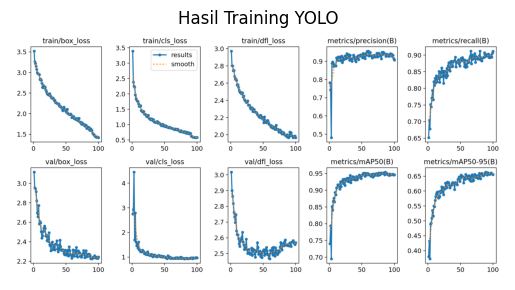

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os

# Load model
model_path = "/kaggle/working/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

# Cek hasil evaluasi model (val)
metrics = model.val()

results_path = "/kaggle/working/runs/detect/train/results.png"
if os.path.exists(results_path):
    img = plt.imread(results_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Hasil Training YOLO")
    plt.show()
else:
    print("Gambar results.png tidak ditemukan di path:", results_path)
